### Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10) #Первые 10 строк для знакомства

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Из общей информации на перывй взляд видим что:
<ul>

<li>Необходимо привести наименования столбцов к нижнему регистру(так же возможно и внутри определенных столбцов после полного анализа)</li>

<li>Year_of_Release имеет тип float, его надо привеcти к int</li>

<li>User_scores надо к float64</li>
    
<li>Critic_Score похоже не нуждается в типе float, т.к. значения целые</li>
    
<li> Critic_Score, User_Score, Rating имеют значительные пропуски </li>
</ul>

#### Привидем наименования столбцов к нижнему регистру

In [6]:
df = df.rename(str.lower, axis='columns')

In [7]:
df.columns #Проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка столбца year_of_release

In [8]:
df['year_of_release'].isna().sum()

269

<li>year_of_release 269 пропущеных значений, это 1.6% я решаю их удалить</li>

In [9]:
df = df.dropna(subset=['year_of_release']) 
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')

<li>Преобразовал в тип int</li>

In [11]:
df['year_of_release'].isna().sum() #проверка

0

In [12]:
df['year_of_release'].dtypes#проверка

dtype('int64')

#### Обработка столбца critic_score

In [13]:
df['critic_score'].isna().sum()

8463

In [14]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

<li> Пропущеных значений очень много, при этом категория столбца такая что тут невозможно заменить значение каким либо средним или медианной</li>
<li> Так же оценки критиков имеют целой число, поэтому приведу этот тив в int </li>

In [15]:
df['critic_score'] = df['critic_score'].astype(float) #не получается в int перевести почему-то

In [16]:
df['critic_score'].dtypes #проверка

dtype('float64')

#### Обработка столбцов name и genre 

<li>У столбоцов по два пропущеных значения, я их решаю удалить</li>

In [17]:
df = df.dropna(subset=['name', 'genre']) 

In [18]:
df['name'].isna().sum() #проверка

0

In [19]:
df['genre'].isna().sum() #проверка

0

#### Проверка на дубликаты

In [20]:
df.duplicated().sum()

0

<li> Явных дубликатов нет</li>
<li>Проверю два столбца на неявные дубликаты genre и platform</li>

In [21]:
df['platform'].sort_values().unique() #проверка на неявные дубликаты

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [22]:
df['genre'].sort_values().unique() #проверка на неявные дубликаты

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

<li>Неявных дубликатов не обнаружено</li>

In [23]:
df[df.duplicated(['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [24]:
df = df.drop_duplicates(subset=['name', 'platform'], keep='last')

#### Обработка столбцов user_score

In [25]:
df['user_score'].isna().sum()

6605

In [26]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

<li>имеет тип object считаю что нужно переделать в float</li>
<li>tbd - to be determined значение еще не опрделено</li>
<li>nan - пропущенные значения</li>
<li> cчитаю что так же как и оценки критиков тут нельзя заполнить средней или медианной

In [27]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan #привел tbd в nan

In [28]:
df['user_score'] = df['user_score'].astype('float')

In [29]:
df['user_score'].dtypes #проверка

dtype('float64')

#### Суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [30]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  total_sales      16441 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Удалено 274 строк

Привел наименования столбцов к нижнему регистру

user_scores преобразовал к float64

Проверил на дубликаты и удалил дубликаты.

### Анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

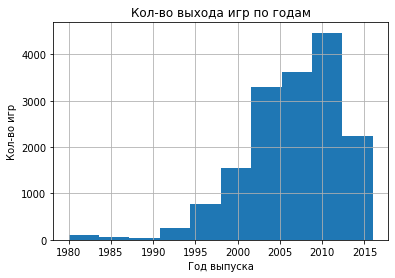

In [33]:
df['year_of_release'].hist()
plt.ylabel('Кол-во игр')
plt.xlabel('Год выпуска')
plt.title('Кол-во выхода игр по годам')
plt.show()

<li>По гистограмме видно что до 1994 кол-во игр не большое, до 1993 включительно можно отсеять</li>
<li>По гистограмме видно что пик производства игр приходит на 2008 и 2009 год</li>
<li>C 2010 года пошел спад</li>

In [34]:
count_games_in_year = (
    df.query('year_of_release > 1993')
        .pivot_table(index='year_of_release', values='name', aggfunc='count'))

In [35]:
#count_games_in_year.plot(figsize = (20, 8), grid = True, title = 'Кол-во игр в год с 1994', kind='pie', subplots=True) #просто балуюсь изучаю

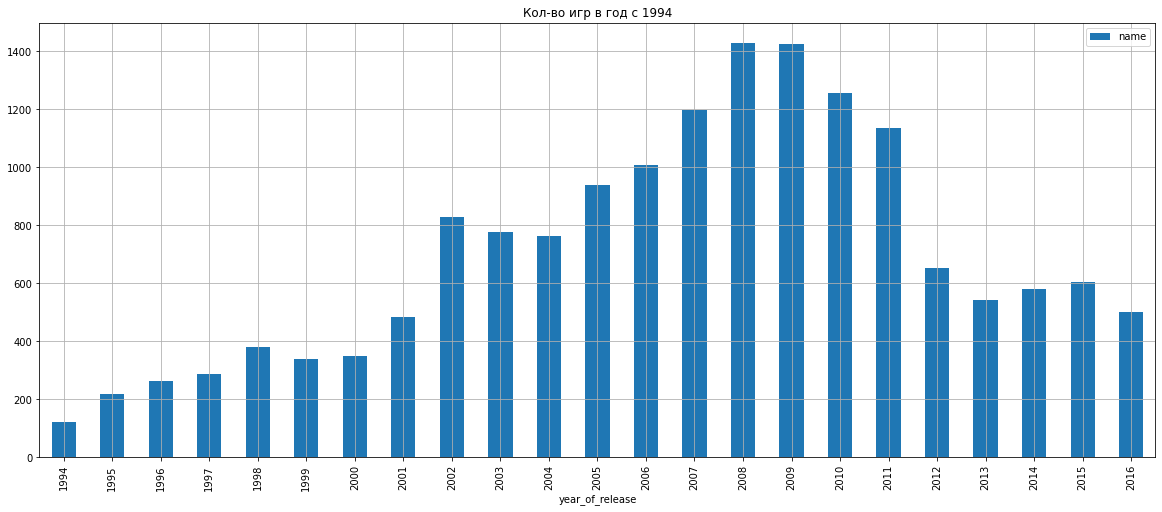

In [36]:
count_games_in_year.plot(figsize = (20, 8), grid = True, title = 'Кол-во игр в год с 1994', kind='bar') #просто балуюсь изучаю
plt.show()

#### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
sales_on_platform = (
    df.query('year_of_release > 1995')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False))

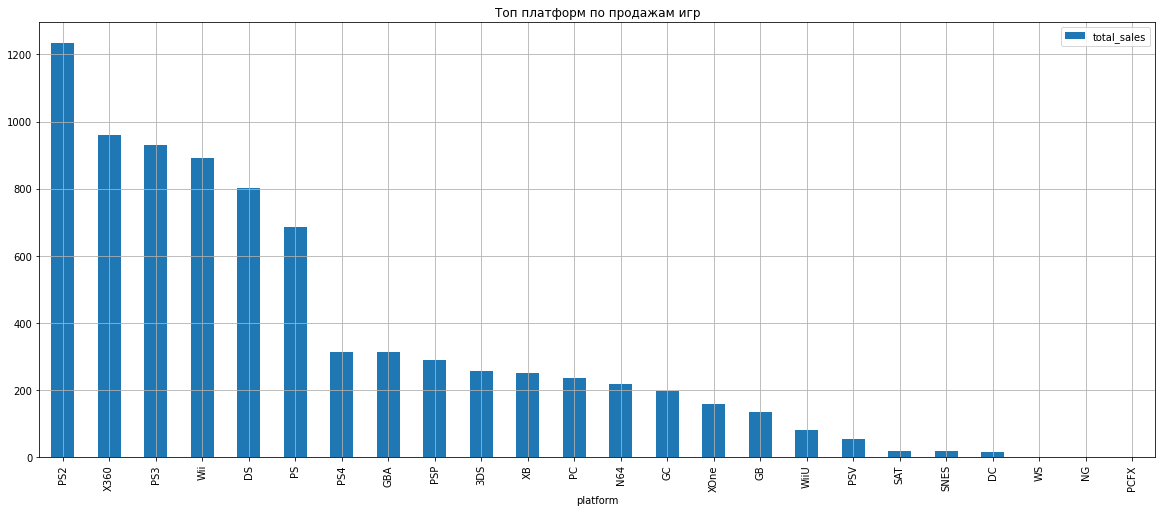

In [38]:
sales_on_platform.plot(figsize = (20, 8), grid = True, title = 'Топ платформ по продажам игр', kind='bar')
plt.show()

<li>Из графика видно что количество продаж больше всего у PS2, X360, PS3, Wii, DS </li>
<li>Теперь сделаю распределение по годам</li>

In [39]:
sales_on_platform_in_years = (
    df.query('year_of_release > 1995')
    .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False))

In [40]:
sales_on_platform_in_years.head()

total_sales
platform year_of_release             
PS2      2004                  211.81
Wii      2009                  206.97
PS2      2002                  205.38
         2003                  184.31
Wii      2008                  171.32

<li>Из таблицы видно что топ продаж занимает платформа PS2 продавшая 211.81 в 2004 году</li>

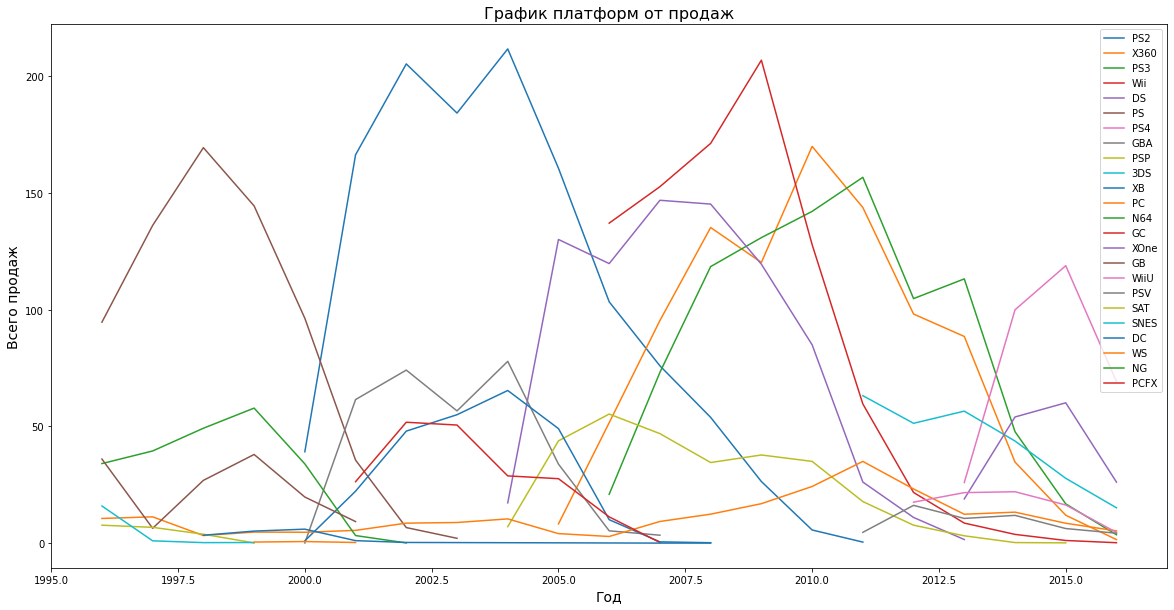

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
for name in sales_on_platform.index:
    boxplot =  sns.lineplot(
        data = sales_on_platform_in_years.loc[name],
        x='year_of_release',
        y='total_sales')
    boxplot.legend(sales_on_platform.index.unique())
    boxplot.axes.set_title('График платформ от продаж', fontsize=16)
    boxplot.set_xlabel("Год", fontsize=14)
    boxplot.set_ylabel("Всего продаж", fontsize=14);
plt.show()

<li>По каждому графику видно что в с начала появления до начала спада с пика проходит в среднем 5 лет</li>

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

#### Актуальный период возьму с 2012 года 

In [42]:
actual_period = (
    df.query('year_of_release > 2013')
)

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [43]:
actual_period_platform = (actual_period
                         .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                         .sort_values(by='total_sales', ascending=False)
                         )

In [44]:
actual_period_platform.head()

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


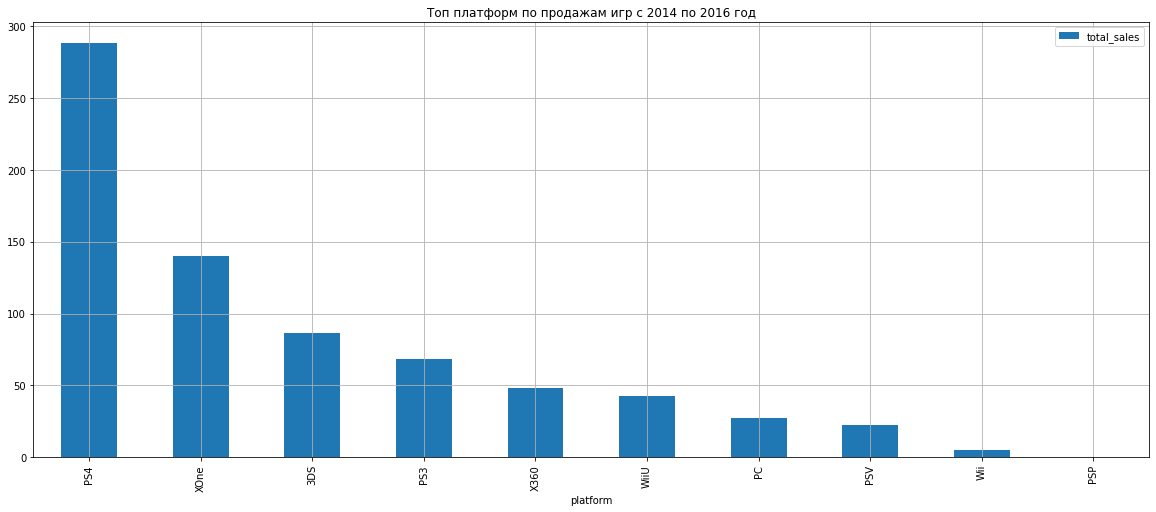

In [45]:
actual_period_platform.plot(figsize = (20, 8),
                            grid = True,
                            title = 'Топ платформ по продажам игр c 2014 по 2016 год', 
                            kind='bar')
plt.show()

<li>Из гистограммы видим что в период с 2014 по 2016 год лидируют платформы PS4, XOne, 3DS, PS3, X360</li>

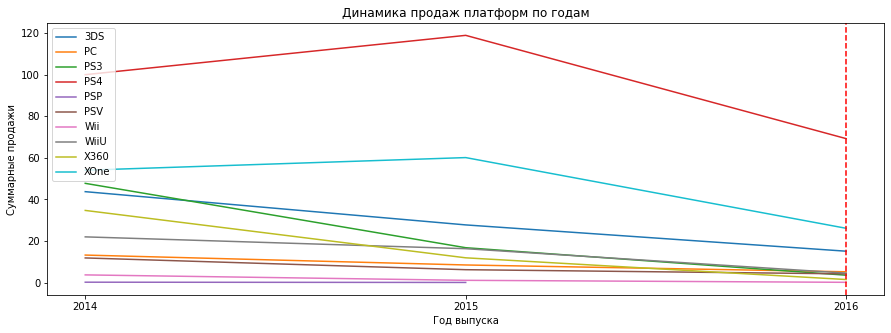

In [46]:
actual_period.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
  .plot(figsize = (15, 5), title = 'Динамика продаж платформ по годам')
plt.axvline(x = 2016 , color = 'r', linestyle = 'dashed')
plt.gca().set_xticks(actual_period['year_of_release'].unique())
plt.legend(loc="upper left")
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

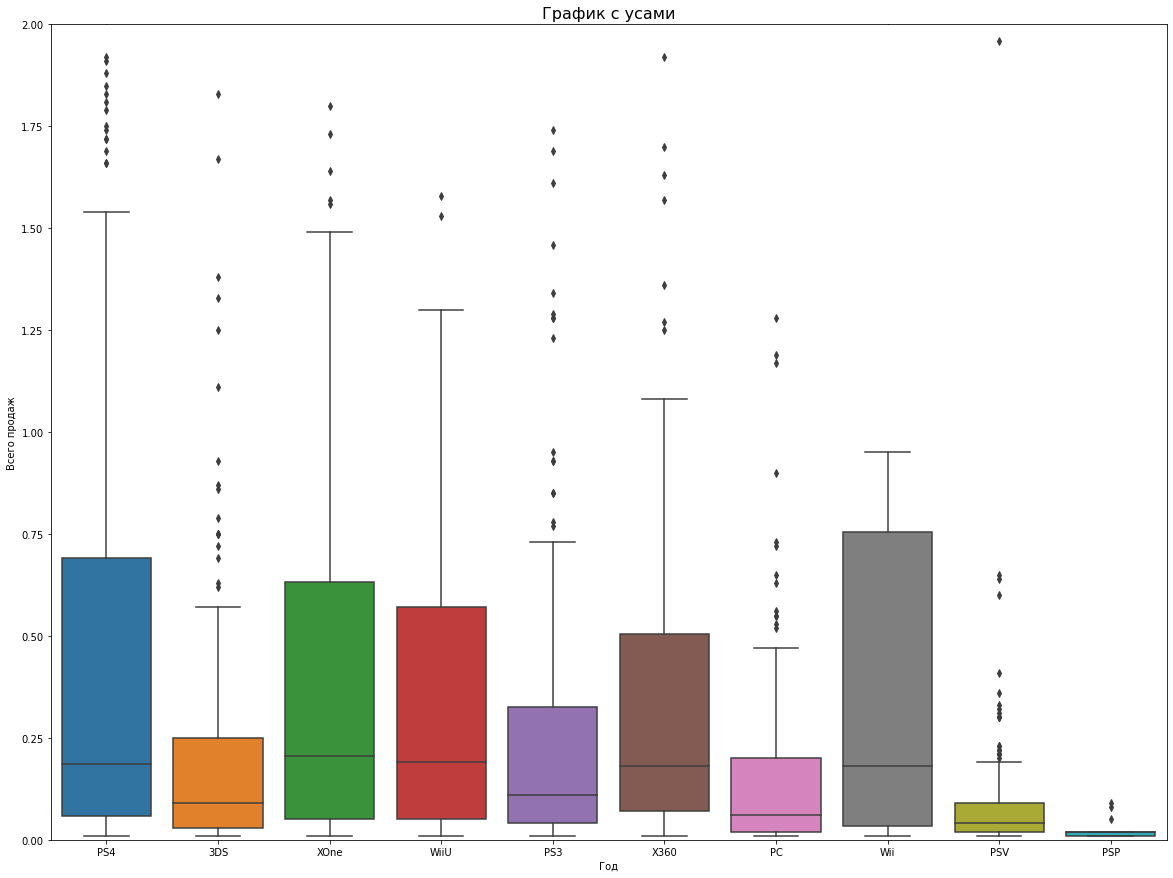

In [47]:
fig, ax = plt.subplots(figsize =(20, 15))
boxplot = sns.boxplot(data = actual_period,
            x = 'platform', 
            y = 'total_sales')
boxplot.axes.set_title('График с усами', fontsize=16)
boxplot.set_xlabel('Год')
boxplot.set_ylabel('Всего продаж')
plt.ylim(0, 2)
plt.show()

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

In [52]:
cor_list = ['critic_score', 'user_score']

for value in cor_list:
    for name in actual_period_platform.index[:5]:
        print('Коэффициент корреляции', value, 'и total_sales', 'для платформы', name)
        print(actual_period.query('platform == @name').dropna()[value]\
              .corr(actual_period.query('platform == @name').dropna()['total_sales']))
        print()        

Коэффициент корреляции critic_score и total_sales для платформы PS4
0.40080804736482517

Коэффициент корреляции critic_score и total_sales для платформы XOne
0.4209942310102164

Коэффициент корреляции critic_score и total_sales для платформы 3DS
0.28468579095782925

Коэффициент корреляции critic_score и total_sales для платформы PS3
0.44657460493190704

Коэффициент корреляции critic_score и total_sales для платформы X360
0.5257228356581523

Коэффициент корреляции user_score и total_sales для платформы PS4
-0.04198779958143553

Коэффициент корреляции user_score и total_sales для платформы XOne
-0.07408488577477357

Коэффициент корреляции user_score и total_sales для платформы 3DS
0.2798498792503281

Коэффициент корреляции user_score и total_sales для платформы PS3
0.15659516181359956

Коэффициент корреляции user_score и total_sales для платформы X360
0.33651362483599345



Получается оценки критиков зависят от цены, то есть чем выше тем больше продаж
А вот с оценками пользователей по другому, для платформы PS4 и XOne они действуют даже отрицатльно, а на 3ds ps3 и x360 пположительно

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

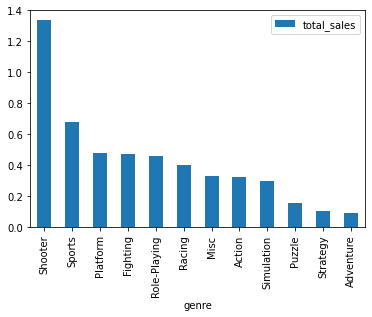

In [53]:
(actual_period.pivot_table(index='genre',
                          values='total_sales',
                          aggfunc='mean')
                          .sort_values(by='total_sales', ascending=False)
                          .plot(kind='bar')
)
plt.show()

Оказалось что самые популярные Shooter, Platform, Sports, Role-Playing, racing 

### Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж. Определите для пользователя каждого региона (NA, EU, JP):

In [54]:
na_top_platform = (actual_period
                  .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                  .sort_values(by='na_sales', ascending=False))[:5]
eu_top_platform = (actual_period
                  .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                  .sort_values(by='eu_sales', ascending=False))[:5]
jp_top_platform = (actual_period
                  .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                  .sort_values(by='jp_sales', ascending=False))[:5]

In [55]:
na_top_platform.head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [56]:
eu_top_platform.head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [57]:
jp_top_platform.head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


<li>Для NA 1 место занимет X360 </li>
<li>Для EU 1 место занимет PS4 </li>
<li>Для JP 1 место занимет 3DS </li>

In [58]:
all_top_platform  = pd.concat([na_top_platform, eu_top_platform, jp_top_platform], axis=1)
all_top_platform.head()

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,NaN
X360,28.30,NaN,NaN
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


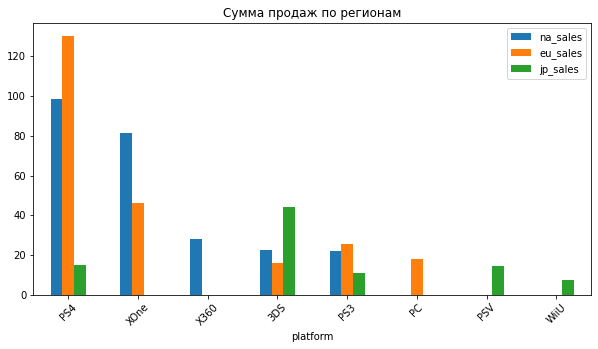

In [59]:
all_top_platform.plot(kind='bar', figsize=(10, 5))
plt.title('Сумма продаж по регионам')
plt.xticks(rotation=45)
plt.show()

Из графика видно что:
<li>На платформе X360 больше всего продаж на американском рынке, 1/3 от всех продаж на этом рынке принадлежит еропейским пользователям. Японцы не играют на этой платформе</li>
<li>На платформе PS4 преобладет еропейские продажи, не намного остает амереканский, и очень мало японских продаж</li>
<li>На платформе PS3 примерное равенство между америнскими и европейскими продажами, очень мало японских.</li>
<li>На платформе XOne в основном продаже на игр на американский рынок, так же примерно 1/3 на еропейском рынке. Японцы не играют на этой платформе.</li>
<li>На платформе 3DS лидируют продажи игр на японском рынке, присутсвуют продаже на еропейский и американский рынок.</li>
<li>Платформы PSV и Wiiu играют и покупают только японские польщователи</li>

#### Самые популярные жанры (топ-5). Поясните разницу

In [60]:
na_top_genre = (actual_period
                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                .sort_values(by='na_sales', ascending=False))[:5]
eu_top_genre = (actual_period
                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                .sort_values(by='eu_sales', ascending=False))[:5]
jp_top_genre = (actual_period
                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                .sort_values(by='jp_sales', ascending=False))[:5]

In [61]:
na_top_genre

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [62]:
eu_top_genre

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [63]:
jp_top_genre

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [64]:
all_top_genre  = pd.concat([na_top_genre, eu_top_genre, jp_top_genre], axis=1)
all_top_genre.head()

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,NaN
Role-Playing,33.47,28.17,31.16
Misc,15.05,NaN,5.61


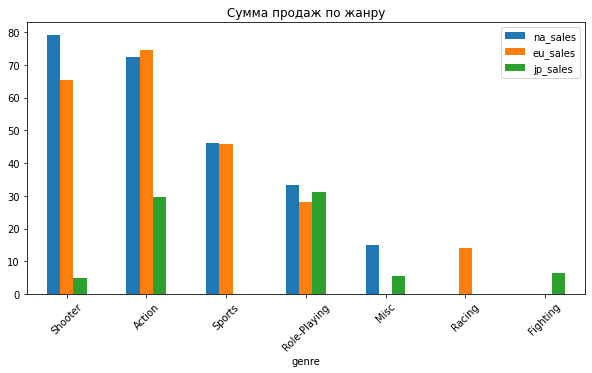

In [65]:
all_top_genre.plot(kind='bar', figsize=(10, 5))
plt.title('Сумма продаж по жанру')
plt.xticks(rotation=45)
plt.show()

**Из графика видим что: **
<li>Жанр Action покупают американцы и еропейцы, японцы покупают достаточно не много</li>
<li>Жанр Shooter покупают американцы и еропейцы, японцы в этот жанр не играют</li>
<li>Жанр Sports покупают американцы и еропейцы, японцы в этот жанр не играют</li>
<li>Жанр Role-Playing покупают американцы, европейцы и японцы примерно по ровну</li>
<li>Жанр Misc покупают в основом американцы и немного японцы. Еропейцы не играют в этот жанр</li>
<li>Жанр Racing покупают только европейцы. Американские и японские игроки не играют в этот жанр</li>
<li>Жанр Simulation и Fighting покупают только японцы. Американские и европейские игроки не играют в этот жанр</li>

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [66]:
actual_period.rating = actual_period.rating.fillna('unkown')
actual_period.rating.unique()

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['unkown', 'M', 'E', 'T', 'E10+'], dtype=object)

In [67]:
na_top_rating = (actual_period
                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                .sort_values(by='na_sales', ascending=False))
eu_top_rating = (actual_period
                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                .sort_values(by='eu_sales', ascending=False))
jp_top_rating = (actual_period
                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                .sort_values(by='jp_sales', ascending=False))

In [68]:
na_top_rating

,na_sales
rating,
M,96.42
unkown,64.72
E,50.74
T,38.95
E10+,33.23


In [69]:
eu_top_rating

,eu_sales
rating,
M,93.44
unkown,58.95
E,58.06
T,34.07
E10+,26.16


In [70]:
jp_top_rating

,jp_sales
rating,
unkown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


In [71]:
all_top_rating  = pd.concat([na_top_rating, eu_top_rating, jp_top_rating], axis=1)
all_top_rating.head(50)

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
unkown,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


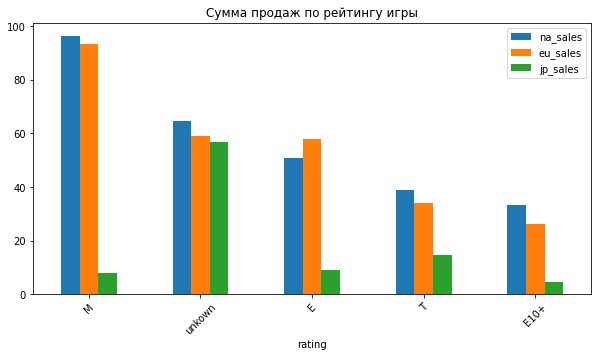

In [72]:
all_top_rating.plot(kind='bar', figsize=(10, 5))
plt.title('Сумма продаж по рейтингу игры')
plt.xticks(rotation=45)
plt.show()

**Из графика видно что:**
<li>Рейтинг M продается чуть больше на американском рынке, и на еропейском. Совсем не много продается на японском рынке</li>
<li>Рейтинг E продается по равну на американском и еропейском рынке. Совсем не много продается на японском рынке</li>
<li>Рейтинг E10+ продается чуть больше на американском рынке, и на еропейском. Совсем не много продается на японском рынке</li>
<li>Рейтинг T продается чуть больше на американском рынке, и на еропейском. Совсем не много продается на японском рынке</li>
<li>Игры без рейтинга примерно одинаково покупаются</li>


### Проверьте гипотезы

#### Гипотиза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотиза H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются**

In [73]:
xone = actual_period.query('platform == "XOne"')['user_score'].dropna()
pc = actual_period.query('platform == "PC"')['user_score'].dropna()
var_xone = np.var(xone)
var_pc = np.var(pc)
print('Диспресия для XOne:', var_xone)
print('Диспресия для PC:', var_pc)
if var_xone == var_pc:
      print("Диспресии равны")
else:
      print('Дисперсии не равны')

Диспресия для XOne: 1.8795460055096425
Диспресия для PC: 2.8773743617307175
Дисперсии не равны


In [74]:
alpha = .05


results = st.ttest_ind(xone, pc, equal_var=False)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**

H0: гипотезу не слудет отвергать

#### H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

**H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

In [75]:
action = actual_period.query('genre == "Action"')['user_score'].dropna()
sports = actual_period.query('genre == "Sports"')['user_score'].dropna()
var_action = np.var(action)
var_sports = np.var(sports)
print('Диспресия для Action:', var_action)
print('Диспресия для Sports:', var_sports)
if var_action == var_sports:
      print("Диспресии равны")
else:
      print('Дисперсии не равны')

Диспресия для Action: 1.89208448117539
Диспресия для Sports: 3.4198375596751185
Дисперсии не равны


In [76]:
alpha = 0.05


results = st.ttest_ind(sports, action, equal_var=False)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**

Гипотезу H0 можно отвергнуть

### Общий вывод

***Выводы сделны за период с 2012 по 2016 год:***

***Топ платформ по регионам***

**Топ 5 платформ в NA**
<ol>
    <li>X360</li>
    <li>PS4</li>
    <li>PS3</li>
    <li>XOne</li>
    <li>3DS</li>
</ol>

**Топ 5 платформ в EU**
<ol>
    <li>PS4</li>
    <li>PS3</li>
    <li>X360</li>
    <li>XOne</li>
    <li>3DS</li>
</ol>

**Топ 5 платформ в JP**
<ol>
    <li>3DS</li>
    <li>PS3</li>
    <li>PSV</li>
    <li>PS4</li>
    <li>WiiU</li>
</ol>

***Топ жанров по регионам***

**Топ 5 жанров в NA**
<ol>
    <li>Action</li>
    <li>Shooter</li>
    <li>Sports</li>
    <li>Role-Playing</li>
    <li>Misc</li>
</ol>

**Топ 5 жанров в EU**
<ol>
    <li>Action</li>
    <li>Shooter</li>
    <li>Sports</li>
    <li>Role-Playing</li>
    <li>Racing</li>
</ol>

**Топ 5 жанров в JP**
<ol>
    <li>Role-Playing</li>
    <li>Action</li>
    <li>Misc</li>
    <li>Simulation</li>
    <li>Fighting</li>
</ol>

***Топ 5 игр с рейтингами по регионам***

**Топ 5 рейтингов в NA**
<ol>
    <li>M</li>
    <li>E</li>
    <li>unkown</li>
    <li>E10+</li>
    <li>T</li>
</ol>


**Топ 5 рейтингов в EU**
<ol>
    <li>M</li>
    <li>E</li>
    <li>unkown</li>
    <li>E10+</li>
    <li>T</li>
</ol>

**Топ 5 рейтингов в JP**
<ol>
    <li>unkown</li>
    <li>E</li>
    <li>T</li>
    <li>M</li>
    <li>E10+</li>
</ol>

<li>Для рынка NA наилучше всего выпускать игры для x360 и ps4, в жанре action и shooter с рейтингом M и E</li>
<li>Для рынка EU наилучше всего выпускать игры для ps4 и ps3, в жанре action и shooter с рейтингом M и E</li>
<li>Для рынка JP наилучше всего выпускать игры для 3DS и ps3, в жанре Role-Playing и action с рейтингом "безрейтинга" и E</li>


**Так же проверили гипотезы**

<li>Средние пользовательские рейтинги платформ Xbox One и PC не отличаются</li>
<li>Средние пользовательские рейтинги жанров Action и Sports разные</li>
